In [1]:
# Carrega as bibliotecas
import pandas as pd # biblioteca para manipulação de dados e data frames
import matplotlib.pyplot as plt
import yfinance as yf 
from pandas.tseries import offsets

In [2]:
bpp = pd.read_csv('dfp_cia_aberta_BPP_con_2010-2024.csv')

In [3]:
bpa = pd.read_csv('dfp_cia_aberta_BPA_con_2010-2024.csv')

In [4]:
# bpa

In [5]:
# Realiza a leitura do arquivo
dre = pd.read_csv('dfp_cia_aberta_DRE_con_2010-2024.csv')

In [6]:
number_stocks=pd.read_csv('number_stocks.csv')

In [7]:
def convert_ticker_to_number(ticker):
    var =number_stocks.loc[number_stocks['Ticker']==ticker]['cvm_code'].values[0]
    return var

In [8]:
def take_number_shares(ticker):
    var =number_stocks.loc[number_stocks['Ticker']==ticker]['acoes'].values[0]
    return var

In [9]:
def pega_dre(ticker_num):
        # Realiza o filtro das contas contábeis, do código CVM e da ordem do exercício
        dados = dre[dre.CD_CONTA.isin(["3.01", # Receita de Venda de Bens e/ou Serviços
        "3.03", # Resultado Bruto
        "3.05", # EBIT
        "3.09", # Lucro/Prejuízo Consolidado do Período
        "3.11" # Lucro/Prejuízo Consolidado do Período
        ]) & dre.CD_CVM.isin([ticker_num]) & (dre.ORDEM_EXERC == 'ÚLTIMO')]
        # Seleciona as colunas
        dados = dados[["DT_REFER", "DENOM_CIA", "CD_CONTA", "DS_CONTA", "VL_CONTA"]]

        # Converte a coluna de data para datetime
        dados['DT_REFER'] = pd.to_datetime(dados['DT_REFER'])

        # Cria a coluna Ano
        dados['Ano'] = dados['DT_REFER']
#         dados.reset_index(drop=True)
        dados.index=pd.to_datetime(dados['DT_REFER'],format='%Y%m%d')
        return dados

In [10]:
def pega_bpp(ticker_num):
        # Realiza o filtro das contas contábeis, do código CVM e da ordem do exercício
        dados = bpp[bpp.CD_CONTA.isin(["2", # Passivo total
                                        "2.03" #Patrimônio Liquido consolidado
        ]) & bpp.CD_CVM.isin([ticker_num]) & (bpp.ORDEM_EXERC == 'ÚLTIMO')]
        # Seleciona as colunas
        dados = dados[["DT_REFER", "DENOM_CIA", "CD_CONTA", "DS_CONTA", "VL_CONTA"]]

        # Converte a coluna de data para datetime
        dados['DT_REFER'] = pd.to_datetime(dados['DT_REFER'])

        # Cria a coluna Ano
        dados['Ano'] = dados['DT_REFER']
        dados.reset_index(drop=True)
        dados.index=pd.to_datetime(dados['DT_REFER'],format='%Y%m%d')
        return dados

In [11]:
def pega_bpa(ticker_num):
        # Realiza o filtro das contas contábeis, do código CVM e da ordem do exercício
        dados = bpa[bpa.CD_CONTA.isin(["1", # Ativo total
        ]) & bpa.CD_CVM.isin([ticker_num]) & (bpa.ORDEM_EXERC == 'ÚLTIMO')]
        # Seleciona as colunas
        dados = dados[["DT_REFER", "DENOM_CIA", "CD_CONTA", "DS_CONTA", "VL_CONTA"]]

        # Converte a coluna de data para datetime
        dados['DT_REFER'] = pd.to_datetime(dados['DT_REFER'])

        # Cria a coluna Ano
        dados['Ano'] = dados['DT_REFER']
        dados.reset_index(drop=True)
        dados.index=pd.to_datetime(dados['DT_REFER'],format='%Y%m%d')
        return dados

In [12]:
data_ini = "2010-01-01"
data_fim = "2024-10-20"

In [13]:
ticker = 'PETR4'
ticker_num = convert_ticker_to_number(ticker)
dados = pega_dre(ticker_num)
dados_bpp=pega_bpp(ticker_num)
dados_bpa=pega_bpa(ticker_num)

[*********************100%***********************]  1 of 1 completed


/home/zavanin/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


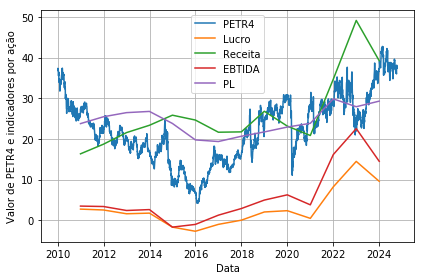

In [14]:
lucro = dados.loc[dados['CD_CONTA']=='3.09']
receita = dados.loc[dados['CD_CONTA']=='3.01']
ebtida=dados.loc[dados['CD_CONTA']=='3.05']
passivo=dados_bpp.loc[dados_bpp['CD_CONTA']=='2']
ativo=dados_bpa.loc[dados_bpa['CD_CONTA']=='1']
pl_cons=dados_bpp.loc[dados_bpp['CD_CONTA']=='2.03']

stock_ticker = yf.download(ticker+'.SA', start=data_ini, end=data_fim)

# Set the index to a datetime type
stock_ticker.index = pd.to_datetime(stock_ticker.index)

plt.plot(stock_ticker.index,stock_ticker['Open'],label=ticker)
plt.plot(lucro.index,lucro['VL_CONTA']*1000/take_number_shares(ticker),label='Lucro')
plt.plot(receita.index,receita['VL_CONTA']*1000/take_number_shares(ticker),label='Receita')
plt.plot(ebtida.index,ebtida['VL_CONTA']*1000/take_number_shares(ticker),label='EBTIDA')
# plt.plot(ativo.index,ativo['VL_CONTA']*1000/take_number_shares(ticker),label='Ativo')
plt.plot(pl_cons.index,pl_cons['VL_CONTA']*1000/take_number_shares(ticker),label='PL')
plt.legend(loc='upper center')
plt.xlabel('Data')
plt.ylabel('Valor de '+ticker+' e indicadores por ação')
plt.tight_layout()
plt.grid(True)
plt.savefig(ticker+'indicadores.png')

In [15]:
# data_frames = [stock_ticker['Open'].rename(ticker),lucro['VL_CONTA'].rename('Lucro')*1000/take_number_shares(ticker), receita['VL_CONTA'].rename('Receita')*1000/take_number_shares(ticker),passivo['VL_CONTA'].rename('Passivo')*1000/take_number_shares(ticker)]

In [16]:
# from functools import reduce
# df_corr_pre = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
#                                             how='inner'), data_frames)
# corr=df_corr_pre.corr(method='spearman').round(2)
# corr.style.background_gradient(cmap='coolwarm')

In [17]:
#Analisando indicadores margem

In [18]:
dados_pivot = dados.pivot_table(index = ["Ano","DENOM_CIA"], columns = ["CD_CONTA"], values = "VL_CONTA")
# dados_pivot.head()

In [19]:
# Cria os indicadores
indicadores = (dados_pivot.assign(margem_bruta = (dados_pivot["3.03"]) / dados_pivot["3.01"] * 100,margem_liquida = (dados_pivot["3.11"]) / dados_pivot["3.01"] * 100,margem_ebit = (dados_pivot["3.05"]) / dados_pivot["3.01"] * 100))

In [20]:
# Retira o índice
indicadores.reset_index(inplace = True)
# Arrendonda os valores
indicadores = indicadores.round(decimals = 3)
# Seleciona colunas e arredonda valores
indicadores = indicadores[['Ano', 'DENOM_CIA', 'margem_bruta', 'margem_liquida', 'margem_ebit']].round(decimals = 3)
indicadores_long = indicadores.melt(id_vars = ['Ano', 'DENOM_CIA'], var_name = "Indicadores")
indicadores_long['Ano'] = pd.to_datetime(indicadores_long['Ano'],format='%Y%m%d')

In [21]:
margem_bruta=indicadores_long.loc[indicadores_long['Indicadores']=='margem_bruta']
margem_liquida=indicadores_long.loc[indicadores_long['Indicadores']=='margem_liquida']
margem_ebit=indicadores_long.loc[indicadores_long['Indicadores']=='margem_ebit']

In [22]:
margem_ebit

,Ano,DENOM_CIA,Indicadores,value
28,2010-12-31,PETROLEO BRASILEIRO S.A. PETROBRAS,margem_ebit,21.369
29,2011-12-31,PETROLEO BRASILEIRO S.A. PETROBRAS,margem_ebit,18.113
30,2012-12-31,PETROLEO BRASILEIRO S.A. PETROBRAS,margem_ebit,11.186
31,2013-12-31,PETROLEO BRASILEIRO S.A. PETROBRAS,margem_ebit,11.268
32,2014-12-31,PETROLEO BRASILEIRO S.A. PETROBRAS,margem_ebit,-6.498
33,2015-12-31,PETROLEO BRASILEIRO S.A. PETROBRAS,margem_ebit,-4.100
34,2016-12-31,PETROLEO BRASILEIRO S.A. PETROBRAS,margem_ebit,5.832
35,2017-12-31,PETROLEO BRASILEIRO S.A. PETROBRAS,margem_ebit,13.315
36,2018-12-31,PETROLEO BRASILEIRO S.A. PETROBRAS,margem_ebit,18.545
37,2019-12-31,PETROLEO BRASILEIRO S.A. PETROBRAS,margem_ebit,27.031


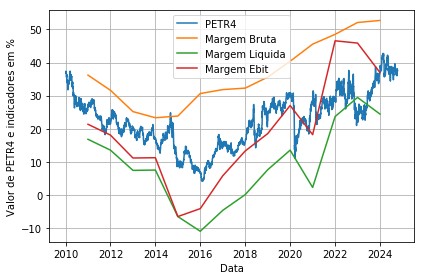

In [23]:
plt.plot(stock_ticker.index,stock_ticker['Open'],label=ticker)
plt.plot(margem_bruta['Ano'],margem_bruta['value'],label='Margem Bruta')
plt.plot(margem_liquida['Ano'],margem_liquida['value'],label='Margem Liquida')
plt.plot(margem_ebit['Ano'],margem_ebit['value'],label='Margem Ebit')
plt.legend(loc='upper center')
plt.xlabel('Data')
plt.ylabel('Valor de '+ticker+' e indicadores em %')
plt.tight_layout()
plt.grid(True)
plt.savefig(ticker+'margens.png')


In [24]:
#Analisando indicadores P/VP e P/L

In [25]:
stock_groupby=stock_ticker.groupby(by=[stock_ticker.index.year]).agg(['mean'])

In [26]:
stock_g_prep=pd.DataFrame(stock_groupby['Open']['mean'],columns=['mean'])

In [27]:
stock_g_prep.index=pd.to_datetime(stock_g_prep.index,format='%Y')

In [28]:
stock_g_prep.index=stock_g_prep.index + offsets.YearEnd()

In [29]:
pl_cons=dados_bpp.loc[dados_bpp['CD_CONTA']=='2.03']
p_vp=pd.DataFrame(stock_g_prep['mean']/(pl_cons['VL_CONTA']/take_number_shares(ticker)*1000),columns=['p_vp'])

In [30]:
lucro.reset_index(drop=True)
lucro.index=pd.to_datetime(lucro['Ano'],format='%Y%m%d')

In [31]:
p_l=pd.DataFrame((stock_g_prep['mean']*take_number_shares(ticker)/1000)/lucro['VL_CONTA'],columns=['P_L'])

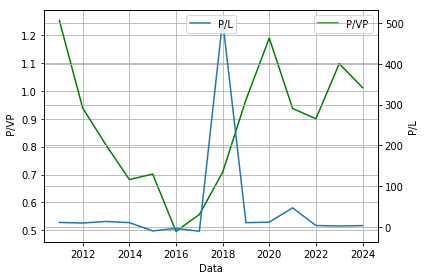

In [32]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# ax1.plot(stock_ticker.index,stock_ticker['Open'],label=ticker)
ax1.plot(p_vp,label='P/VP',color='green')
ax1.set_xlabel("Data")
ax1.set_ylabel(" P/VP")

ax2.plot(p_l,label='P/L')
ax2.set_ylabel("P/L")
ax1.legend()
ax2.legend(loc='upper center')
plt.tight_layout()
ax1.grid(True)
ax2.grid(True)
plt.savefig(ticker+'p_l_e_p_vp.png')